Задание №1 Урок 3
мпортируйте библиотеки pandas и numpy. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42. Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model. Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых. Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics

In [338]:
import numpy as np

In [339]:
import pandas as pd

In [340]:
import matplotlib.pyplot as plt

In [341]:
from sklearn.datasets import load_boston

In [342]:
boston = load_boston()

In [343]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Данные о недвижимости

In [344]:
data = boston.data

In [345]:
data.shape

(506, 13)

In [346]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Target - величина, которую требуется предсказать (Цена на недвижимость)

In [347]:
target = boston.target

Название признаков

In [348]:
feature_names = boston.feature_names

In [349]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Описание датасета

In [350]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Создадим два датафрейма

In [351]:
x = pd.DataFrame(data, columns=feature_names)

In [352]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [353]:
x.shape

(506, 13)

In [354]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [355]:
y = pd.DataFrame(target, columns=['price'])

In [356]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [357]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Разбиение данных на тренировочные и тестовые датасеты

In [358]:
from sklearn.model_selection import train_test_split

In [359]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

Построение модели линейной регрессии

In [360]:
from sklearn.linear_model import LinearRegression

In [361]:
lr = LinearRegression()

Задачи линейной регрессии найти подходящие коэффициенты w
при признаках Х для вычислений  целевой переменной У минимизируя ошибку Е 

Y = W0 + W1 * X1 +W2 * X2+ ... +Wm * Xm + E

In [362]:
lr.fit(x_train, y_train)

LinearRegression()

In [363]:
y_pred = lr.predict(x_test)

In [364]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                          'y_pred': y_pred.flatten()},
                         columns=['y_test', 'y_pred'])

In [365]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


Метрики оценки качества регрессионных моделей

Средняя квадратичная ошибка

In [366]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [367]:
check_test.head()

,y_test,y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280


In [368]:
initial_mse = (check_test['error'] ** 2).mean()
initial_mse

21.517444231177215

In [369]:
from sklearn.metrics import mean_squared_error

In [370]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

21.517444231177215

Средняя абсолютная ошибка

In [371]:
(np.abs(check_test['error'])).mean()

3.1627098714574045

In [372]:
from sklearn.metrics import mean_absolute_error

In [373]:
mean_absolute_error(y_test, y_pred)

3.1627098714574045

R**2

In [374]:
from sklearn.metrics import r2_score

In [375]:
r2_score_1 = r2_score(y_test, y_pred)
r2_score_1

0.7112260057484932


Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble. Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42. Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма. Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания. Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [376]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)

In [377]:
y_train_1 = np.array(y_train.values[:, 0], dtype=int)

In [378]:
model.fit(x_train, y_train_1)

RandomForestClassifier(max_depth=12, n_estimators=1000, random_state=42)

In [379]:
y_pred = model.predict(x_test)
y_pred.shape

(152,)

In [380]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})
 
check_test.head(10)

,y_test,y_pred
173,23.6,22
274,32.4,32
491,13.6,15
72,22.8,23
452,16.1,14
76,20.0,20
316,17.8,19
140,14.0,13
471,19.6,21
500,16.8,21


In [381]:
r2_score_2 = r2_score(y_test, y_pred)
r2_score_2

0.8370756186213897

In [386]:
r2_score_1

0.7112260057484932

#По моему мнению RandomForestRegressor работает лучше, чем модель LinearRegression, но возможно это плохо скажется на переобучаемости модели

*Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [387]:
?RandomForestRegressor

feature_importances_ : ndarray of shape (n_features,)
    The impurity-based feature importances.
    The higher, the more important the feature.
    The importance of a feature is computed as the (normalized)
    total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance.

    Warning: impurity-based feature importances can be misleading for
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.

In [388]:
print(model.feature_importances_)

[0.11547181 0.02147265 0.04959222 0.00974541 0.07278574 0.13763731
 0.10862119 0.10938023 0.03254179 0.04991887 0.05217344 0.09797927
 0.14268006]


In [389]:
print(sum(model.feature_importances_))

1.0


In [390]:
feat_imp = pd.DataFrame({
    "feature_name": boston['feature_names'],
    "feature_importance": model.feature_importances_
})
feat_imp

,feature_name,feature_importance
0,CRIM,0.115472
1,ZN,0.021473
2,INDUS,0.049592
3,CHAS,0.009745
4,NOX,0.072786
5,RM,0.137637
6,AGE,0.108621
7,DIS,0.109380
8,RAD,0.032542
9,TAX,0.049919


In [391]:
feat_imp.sort_values("feature_importance", ascending=False).head(2)

,feature_name,feature_importance
12,LSTAT,0.142680
5,RM,0.137637


Просмотр коэффициентов линейной регрессии

w0

In [54]:
lr.intercept_

array([31.63108404])

w1 .. wm

In [55]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

In [56]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Признак')

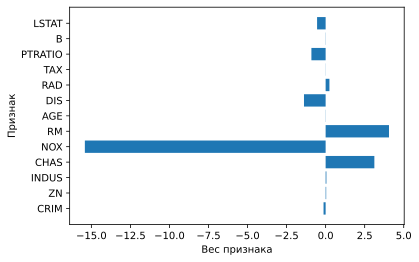

In [57]:
plt.barh(x_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [58]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.469887,11.403955,11.133051,0.073446,0.557259,6.325672,68.799718,3.765874,9.437853,407.042373,18.277966,359.701808,12.421130
std,8.315831,22.608457,6.938651,0.261237,0.116792,0.719211,27.665360,2.126032,8.639971,166.522237,2.256792,86.924779,7.112402
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.130000,0.000000,0.450000,5.889500,46.025000,2.073700,4.000000,279.000000,16.650000,376.782500,6.862500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.227500,77.350000,3.107300,5.000000,330.000000,18.600000,391.600000,10.925000
75%,3.281688,20.000000,18.100000,0.000000,0.631000,6.681750,93.475000,5.400700,24.000000,666.000000,20.200000,396.172500,16.225000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Стандартизация признаков

При стандартизации от признака нужно отнять среднее и поделить на среднеквадратичное отклонение:

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
x_train_scaled = scaler.fit_transform(x_train)

In [62]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)

In [63]:
x_test_scaled = scaler.transform(x_test)

In [64]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [65]:
lr.fit(x_train_scaled, y_train)

LinearRegression()

Text(0, 0.5, 'признак')

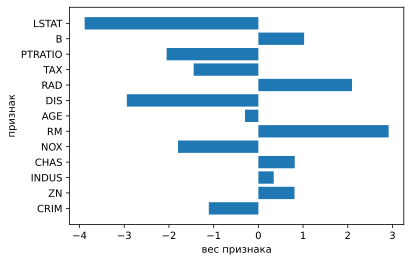

In [66]:
plt.barh(x_train.columns, lr.coef_.flatten())
plt.xlabel('вес признака')
plt.ylabel('признак')

In [67]:
feats = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
'PTRATIO', 'B', 'LSTAT']

In [68]:
def create_model(x_train, y_train, x_test, y_test, feats, model):
    model.fit(x_train.loc[:, feats], y_train)
    y_pred=model.predict(x_test.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [69]:
create_model(x_train_scaled, y_train, x_test_scaled, y_test, feats, LinearRegression())

21.243390345509408

In [70]:
# Сверяем с исходной ошибкой
initial_mse

21.517444231177215

Модели линейной регрессии с регуляризация

In [71]:
from sklearn.linear_model import Lasso, Ridge

Lasso (линейная регрессия с L1 регуляризацией)

In [72]:
# Параметр alpha отвечает за регуляризацию
model = Lasso(alpha=0.003)

In [73]:
create_model(x_train_scaled, y_train, x_test_scaled, y_test, feats, model)

21.26916174592534

Ridge (линейная регрессия с L2 регуляризацией)

In [74]:
# Параметр alpha отвечает за регуляризацию 
model = Ridge(alpha=0.001)

In [75]:
create_model(x_train_scaled, y_train, x_test_scaled, y_test, feats, model)

21.243427093544426

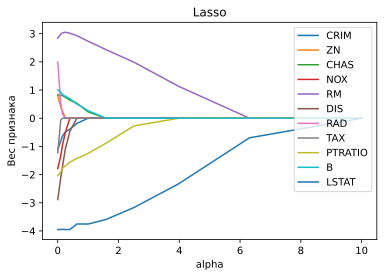

In [76]:
n = 21
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 1, n)
for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha = val)
    lasso.fit(x_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = lasso.coef_.flatten()
    
for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)

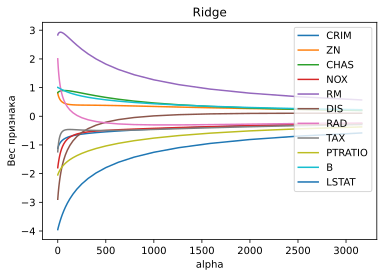

In [77]:
n = 66
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 3.5, n)
for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha = val)
    ridge.fit(x_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = ridge.coef_.flatten()
    
for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)

In [78]:
import pandas as pd

In [79]:
import numpy as np

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
from sklearn.linear_model import LogisticRegression

Логистическая регрессия

In [82]:
data = pd.read_csv('./train.csv')

In [83]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Установим в качестве индекса Passangerid - так нам будет проще отслеживатьм, с информацией о каком пассажире мы работаем

In [84]:
data = data.set_index('PassengerId')

In [85]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Наша задача - определить выжил ли человек на Титанике
В поле Survived выжившие пассажиры обозначены единицей, а утонувшие - 0

In [86]:
target = 'Survived'

In [87]:
y = data[target]

In [88]:
x = data.drop(target, axis=1)

Изучение качества данных и их очистка

In [89]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


В поле Cabin  слишком много пропущенных значений в этом уроке мы не будем его использовать, а также Name и Ticket

Удалим эти поля

In [90]:
x = x.drop(['Cabin', 'Name', 'Ticket'], axis=1)

В поле возраст 20% значений не заполнено. Заменим пропущенные значения на средние

In [91]:
mean_age = x['Age'].mean()
mean_age

29.69911764705882

In [92]:
x['Age'] = x['Age'].fillna(mean_age)

In [93]:
x['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

В поле Embarked, которое является текстовым, не хватает двух значений,
заполним пропущенные значения наиболее часто встречающимися - mode

In [94]:
x['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [95]:
embarked_mode = x['Embarked'].mode()[0]
embarked_mode

'S'

In [96]:
x['Embarked'] = x['Embarked'].fillna(embarked_mode)

In [97]:
x['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [98]:
x.info

<bound method DataFrame.info of              Pclass     Sex        Age  SibSp  Parch     Fare Embarked
PassengerId                                                           
1                 3    male  22.000000      1      0   7.2500        S
2                 1  female  38.000000      1      0  71.2833        C
3                 3  female  26.000000      0      0   7.9250        S
4                 1  female  35.000000      1      0  53.1000        S
5                 3    male  35.000000      0      0   8.0500        S
...             ...     ...        ...    ...    ...      ...      ...
887               2    male  27.000000      0      0  13.0000        S
888               1  female  19.000000      0      0  30.0000        S
889               3  female  29.699118      1      2  23.4500        S
890               1    male  26.000000      0      0  30.0000        C
891               3    male  32.000000      0      0   7.7500        Q

[891 rows x 7 columns]>

Работа с переменными

In [99]:
x['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [100]:
x['Sex'] = (x['Sex'] == 'female').astype(int)

In [101]:
x['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

Еще одна ктегориальная переменная Embarked
Преобразцем ее в dummy переменную

In [102]:
x = pd.get_dummies(x)

In [103]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [104]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.3 KB


In [105]:
x.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,0,22.000000,1,0,7.2500,0,0,1
2,1,1,38.000000,1,0,71.2833,1,0,0
3,3,1,26.000000,0,0,7.9250,0,0,1
4,1,1,35.000000,1,0,53.1000,0,0,1
5,3,0,35.000000,0,0,8.0500,0,0,1
6,3,0,29.699118,0,0,8.4583,0,1,0
7,1,0,54.000000,0,0,51.8625,0,0,1
8,3,0,2.000000,3,1,21.0750,0,0,1
9,3,1,27.000000,0,2,11.1333,0,0,1


In [106]:
x['Pclass'].unique()

array([3, 1, 2])

In [107]:
x['Pclass'] = x['Pclass'].astype('category')

In [108]:
x = pd.get_dummies(x)

In [109]:
x.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [110]:
x.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
1,0,22.000000,1,0,7.2500,0,0,1,0,0,1
2,1,38.000000,1,0,71.2833,1,0,0,1,0,0
3,1,26.000000,0,0,7.9250,0,0,1,0,0,1
4,1,35.000000,1,0,53.1000,0,0,1,1,0,0
5,0,35.000000,0,0,8.0500,0,0,1,0,0,1
6,0,29.699118,0,0,8.4583,0,1,0,0,0,1
7,0,54.000000,0,0,51.8625,0,0,1,1,0,0
8,0,2.000000,3,1,21.0750,0,0,1,0,0,1
9,1,27.000000,0,2,11.1333,0,0,1,0,0,1


In [111]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=42)

In [112]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         668 non-null    int64  
 1   Age         668 non-null    float64
 2   SibSp       668 non-null    int64  
 3   Parch       668 non-null    int64  
 4   Fare        668 non-null    float64
 5   Embarked_C  668 non-null    uint8  
 6   Embarked_Q  668 non-null    uint8  
 7   Embarked_S  668 non-null    uint8  
 8   Pclass_1    668 non-null    uint8  
 9   Pclass_2    668 non-null    uint8  
 10  Pclass_3    668 non-null    uint8  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 35.2 KB


In [113]:
lr = LogisticRegression()

In [114]:
lr.fit(x_train, y_train)

LogisticRegression()

In [115]:
y_pred = lr.predict(x_valid)

In [116]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

Метрика Accuracy

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(y_valid, y_pred)

0.8026905829596412

Можно сравнить Accuracy на тренировочном data сете

In [119]:
y_pred_train = lr.predict(x_train)

In [120]:
accuracy_score(y_train, y_pred_train)

0.8083832335329342

Вычисление вероятностей событий

In [121]:
y_proba = lr.predict_proba(x_valid)

In [122]:
y_proba

array([[0.88803843, 0.11196157],
       [0.73069939, 0.26930061],
       [0.87015658, 0.12984342],
       [0.0899194 , 0.9100806 ],
       [0.25062026, 0.74937974],
       [0.07826311, 0.92173689],
       [0.33446969, 0.66553031],
       [0.90522445, 0.09477555],
       [0.24542495, 0.75457505],
       [0.10340602, 0.89659398],
       [0.69433676, 0.30566324],
       [0.93487209, 0.06512791],
       [0.6248469 , 0.3751531 ],
       [0.84761362, 0.15238638],
       [0.75859303, 0.24140697],
       [0.07898049, 0.92101951],
       [0.72748702, 0.27251298],
       [0.33438502, 0.66561498],
       [0.70247548, 0.29752452],
       [0.70651156, 0.29348844],
       [0.88386349, 0.11613651],
       [0.64286514, 0.35713486],
       [0.39821929, 0.60178071],
       [0.86944946, 0.13055054],
       [0.89833288, 0.10166712],
       [0.92821101, 0.07178899],
       [0.56597441, 0.43402559],
       [0.72832998, 0.27167002],
       [0.91442871, 0.08557129],
       [0.4263841 , 0.5736159 ],
       [0.

In [123]:
x_train.to_pickle('x_train.pkl')
y_train.to_pickle('y_train.pkl')

x_valid.to_pickle('x_valid.pkl')
y_valid.to_pickle('y_valid.pkl')

In [124]:
from sklearn.svm import SVC

In [125]:
x_train = pd.read_pickle('x_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [126]:
x_valid = pd.read_pickle('x_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

Support Vector Machine

Нормализация признаков

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler = MinMaxScaler()

In [129]:
x_train.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,29.699118,0,0,30.5000,0,0,1,1,0,0
885,0,25.000000,0,0,7.0500,0,0,1,0,0,1
248,1,24.000000,0,2,14.5000,0,0,1,0,1,0
479,0,22.000000,0,0,7.5208,0,0,1,0,0,1
306,0,0.920000,1,2,151.5500,0,0,1,1,0,0
317,1,24.000000,1,0,26.0000,0,0,1,0,1,0
3,1,26.000000,0,0,7.9250,0,0,1,0,0,1
406,0,34.000000,1,0,21.0000,0,0,1,0,1,0
743,1,21.000000,2,2,262.3750,1,0,0,1,0,0


In [130]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
cols_for_scale=['Age', 'SibSp', 'Parch', 'Fare']

In [132]:
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])


In [133]:
x_train.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,0.367921,0.000,0.000000,0.059532,0,0,1,1,0,0
885,0,0.308872,0.000,0.000000,0.013761,0,0,1,0,0,1
248,1,0.296306,0.000,0.333333,0.028302,0,0,1,0,1,0
479,0,0.271174,0.000,0.000000,0.014680,0,0,1,0,0,1
306,0,0.006283,0.125,0.333333,0.295806,0,0,1,1,0,0
317,1,0.296306,0.125,0.000000,0.050749,0,0,1,0,1,0
3,1,0.321438,0.000,0.000000,0.015469,0,0,1,0,0,1
406,0,0.421965,0.125,0.000000,0.040989,0,0,1,0,1,0
743,1,0.258608,0.250,0.333333,0.512122,1,0,0,1,0,0


In [134]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,0.365120,0.069237,0.062126,0.062810,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,0.163483,0.148160,0.132598,0.100724,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.000000,0.000000,0.015469,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.028107,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.059532,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
x_valid.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.381166,30.366773,0.430493,0.408072,32.278530,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.486766,12.984435,0.801667,0.837912,43.578316,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.000000,0.830000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,15.245800,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,36.000000,1.000000,1.000000,31.331250,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,71.000000,4.000000,5.000000,262.375000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
x_valid[cols_for_scale] = scaler.fit_transform(x_valid[cols_for_scale])

In [137]:
x_valid.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.381166,0.420932,0.107623,0.081614,0.123024,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.486766,0.185043,0.200417,0.167582,0.166092,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.315947,0.000000,0.000000,0.030094,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.411417,0.000000,0.000000,0.058107,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.501211,0.250000,0.200000,0.119414,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Сохранение и загрузка модели нормализации

In [138]:
import sklearn.externals 

In [139]:
import joblib

In [140]:
joblib.dump(scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

In [141]:
scaler = joblib.load('min_max_scaler.pkl')

SVC

In [142]:
clf = SVC()

In [143]:
clf.fit(x_train, y_train)

SVC()

In [144]:
y_pred = clf.predict(x_valid)

In [145]:
y_pred_train = clf.predict(x_train)

Оценим Accuracy

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
accuracy_score(y_valid, y_pred)

0.8026905829596412

In [148]:
accuracy_score(y_train, y_pred_train)

0.8158682634730539

Тюнинг модели SVC

In [149]:
c_vals = np.logspace(-2, 5, 29)
c_vals

array([1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03, 1.77827941e+03, 3.16227766e+03, 5.62341325e+03,
       1.00000000e+04, 1.77827941e+04, 3.16227766e+04, 5.62341325e+04,
       1.00000000e+05])

In [150]:
accuracy_valid = []
accuracy_train = []
for val in c_vals:
    clf = SVC(C=val)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print('C = {} \n\tacc_valid = {}\n'.format(val, acc_valid, acc_train))

C = 0.01 
	acc_valid = 0.600896860986547

C = 0.01778279410038923 
	acc_valid = 0.600896860986547

C = 0.03162277660168379 
	acc_valid = 0.7802690582959642

C = 0.05623413251903491 
	acc_valid = 0.7847533632286996

C = 0.1 
	acc_valid = 0.8116591928251121

C = 0.1778279410038923 
	acc_valid = 0.8071748878923767

C = 0.31622776601683794 
	acc_valid = 0.8071748878923767

C = 0.5623413251903491 
	acc_valid = 0.8071748878923767

C = 1.0 
	acc_valid = 0.8026905829596412

C = 1.7782794100389228 
	acc_valid = 0.7982062780269058

C = 3.1622776601683795 
	acc_valid = 0.8071748878923767

C = 5.623413251903491 
	acc_valid = 0.8071748878923767

C = 10.0 
	acc_valid = 0.8071748878923767

C = 17.78279410038923 
	acc_valid = 0.8116591928251121

C = 31.622776601683793 
	acc_valid = 0.8071748878923767

C = 56.23413251903491 
	acc_valid = 0.7982062780269058

C = 100.0 
	acc_valid = 0.7982062780269058

C = 177.82794100389228 
	acc_valid = 0.8071748878923767

C = 316.22776601683796 
	acc_valid = 0.8026905

In [151]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

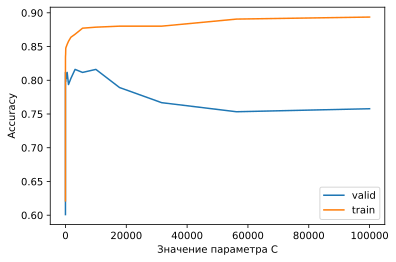

In [152]:
plt.plot(c_vals, accuracy_valid)
plt.plot(c_vals, accuracy_train)
plt.xlabel('Значение параметра С')
plt.ylabel('Accuracy')
plt.legend(['valid', 'train'])

Алгоритм КNN

In [153]:
from pylab import rcParams

In [154]:
from sklearn.neighbors import KNeighborsClassifier

Масштабирование признаков с использованием RobustScaler

In [155]:
from sklearn.preprocessing import RobustScaler

In [156]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [157]:
scaler = RobustScaler()

In [158]:
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])

In [159]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,-0.017145,0.553892,0.062126,0.787570,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,1.000766,1.185279,0.132598,2.285892,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,-2.252240,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.592240,0.000000,0.000000,-0.286822,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.407760,1.000000,0.000000,0.713178,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.869299,8.000000,1.000000,22.056664,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
x_valid[cols_for_scale] = scaler.transform(x_valid[cols_for_scale])

Классификация с помощью KNN

In [161]:
k_vals = np.arange(2, 10)

In [162]:
accuracy_valid = []
accuracy_train = []
for val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print('n_neighbors = {} \n\tacc_valid = {}\n'.format(val, acc_valid, acc_train))

n_neighbors = 2 
	acc_valid = 0.6860986547085202

n_neighbors = 3 
	acc_valid = 0.7713004484304933

n_neighbors = 4 
	acc_valid = 0.7443946188340808

n_neighbors = 5 
	acc_valid = 0.7982062780269058

n_neighbors = 6 
	acc_valid = 0.7713004484304933

n_neighbors = 7 
	acc_valid = 0.7892376681614349

n_neighbors = 8 
	acc_valid = 0.7892376681614349

n_neighbors = 9 
	acc_valid = 0.7847533632286996



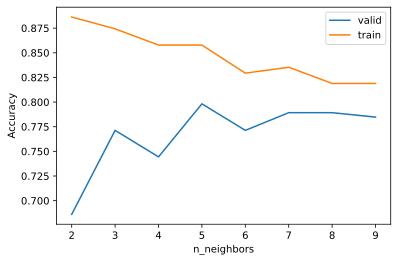

In [163]:
plt.plot(k_vals, accuracy_valid)
plt.plot(k_vals, accuracy_train)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['valid', 'train'])

In [164]:
clf = KNeighborsClassifier(n_neighbors = 6)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)

In [165]:
accuracy_score(y_valid, y_pred)

0.7713004484304933

Точность и полнота

In [166]:
y_valid.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

In [167]:
from sklearn.metrics import confusion_matrix

In [168]:
confusion_matrix(y_valid, y_pred)

array([[115,  19],
       [ 32,  57]])

TRUE NEGATIVE

In [169]:
TN = ((y_valid == 0) & (y_pred == 0)).sum()
TN

115

FALSE POSITIVE

In [170]:
FP = ((y_valid == 0) & (y_pred == 1)).sum()
FP

19

FALSE NEGATIVE

In [171]:
FN = ((y_valid == 1) & (y_pred == 0)).sum()
FN

32

TRUE POSITIVE

In [172]:
TP = ((y_valid == 1) & (y_pred == 1)).sum()
TP

57

In [173]:
# Normalize confusion matrix
cm = confusion_matrix(y_valid, y_pred) / y_valid.shape[0]
cm

array([[0.51569507, 0.08520179],
       [0.14349776, 0.25560538]])

Точность

In [174]:
Precision = TP / (TP + FP)
Precision

0.75

In [175]:
from sklearn.metrics import precision_score

In [176]:
precision_score(y_valid, y_pred)

0.75

Полнота

In [177]:
Recall = TP / (TP + FN)
Recall

0.6404494382022472

In [178]:
from sklearn.metrics import recall_score

In [179]:
recall_score(y_valid, y_pred)

0.6404494382022472

F1 score

In [180]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
F1

0.6909090909090909

In [181]:
from sklearn.metrics import f1_score

In [182]:
f1_score(y_valid, y_pred)

0.6909090909090909

Метрика AUC

In [183]:
y_pred_proba = clf.predict_proba(x_valid)

In [184]:
y_pred_proba

array([[0.5       , 0.5       ],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.16666667, 0.83333333],
       [0.5       , 0.5       ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.33333333, 0.66666667],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.16666667, 0.83333333],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.

In [185]:
y_pred_proba = y_pred_proba[:, 1]

In [186]:
y_pred_proba

array([0.5       , 0.16666667, 0.        , 0.83333333, 0.5       ,
       0.66666667, 0.66666667, 0.16666667, 0.5       , 0.66666667,
       0.5       , 0.        , 0.        , 0.        , 0.        ,
       0.83333333, 0.33333333, 0.66666667, 0.16666667, 0.33333333,
       0.16666667, 0.        , 0.16666667, 0.        , 0.        ,
       0.        , 0.33333333, 0.16666667, 0.        , 0.33333333,
       0.        , 0.16666667, 0.66666667, 0.33333333, 0.        ,
       0.5       , 0.        , 0.66666667, 1.        , 0.        ,
       0.5       , 0.        , 0.        , 0.16666667, 0.16666667,
       0.        , 0.        , 0.        , 0.16666667, 0.66666667,
       0.16666667, 1.        , 0.        , 0.83333333, 0.        ,
       0.83333333, 0.16666667, 0.83333333, 0.83333333, 0.5       ,
       0.        , 0.83333333, 0.83333333, 0.        , 0.16666667,
       0.66666667, 0.5       , 0.        , 0.33333333, 0.83333333,
       0.66666667, 0.83333333, 0.66666667, 0.83333333, 0.16666

Text(0, 0.5, 'Количество')

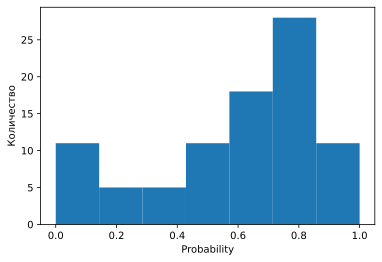

In [187]:
plt.hist(y_pred_proba[y_valid == 1], bins = 7)
plt.xlabel('Probability')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

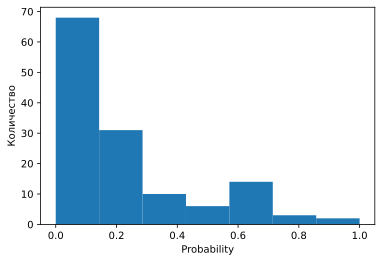

In [188]:
plt.hist(y_pred_proba[y_valid == 0], bins = 7)
plt.xlabel('Probability')
plt.ylabel('Количество')

Text(0, 0.5, 'Density')

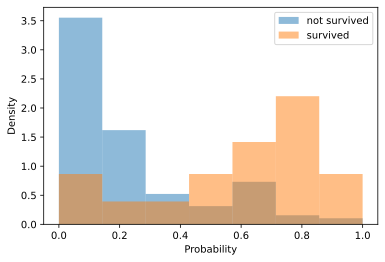

In [189]:
plt.hist(y_pred_proba[y_valid == 0], bins = 7, density = True, alpha=0.5)
plt.hist(y_pred_proba[y_valid == 1], bins = 7, density = True, alpha=0.5)
plt.legend(['not survived', 'survived'])
plt.xlabel('Probability')
plt.ylabel('Density')

In [190]:
from sklearn.metrics import roc_curve

In [191]:
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba, pos_label = 1)

FALSE POSITIVE RATE (fall-out)

In [192]:
fpr

array([0.        , 0.01492537, 0.03731343, 0.14179104, 0.18656716,
       0.26119403, 0.49253731, 1.        ])

In [193]:
tpr

array([0.        , 0.12359551, 0.43820225, 0.64044944, 0.76404494,
       0.82022472, 0.87640449, 1.        ])

In [194]:
 thresholds

array([2.        , 1.        , 0.83333333, 0.66666667, 0.5       ,
       0.33333333, 0.16666667, 0.        ])

In [195]:
#FPR для порога равного 1 
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid ==0).sum()

0.014925373134328358

In [196]:
#TPR для порога равного 1 
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid ==1).sum()

0.12359550561797752

In [197]:
#FPR для порога равного 0.83
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 0.83)).sum() / (y_valid == 0).sum()

0.03731343283582089

In [198]:
#TPR для порога равного 0.83
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 0.83)).sum() / (y_valid == 1).sum()

0.43820224719101125

Text(0.5, 1.0, 'Receiver operating characteristic ROC')

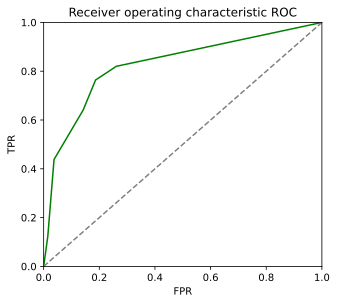

In [199]:
rcParams['figure.figsize'] = 5, 4.5
plt.plot(fpr, tpr, color = 'green', label ='ROC curve')
plt.plot([0, 1], [0, 1],color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver operating characteristic ROC')

In [200]:
from sklearn.metrics import roc_auc_score

In [201]:
roc_auc_score(y_valid, y_pred_proba)

0.8264715747107161

In [202]:
from sklearn.tree import DecisionTreeClassifier

In [203]:
max_depth_arr = np.arange(2, 20)
max_depth_arr

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [204]:
accuracy_valid = []
accuracy_train = []
for val in max_depth_arr:
    clf = DecisionTreeClassifier(max_depth=val, random_state=100)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print('max_depth = {} \n\tacc_valid = {} \n\tacc_train = {}\n'.format(val, acc_valid, acc_train))

max_depth = 2 
	acc_valid = 0.7757847533632287 
	acc_train = 0.8023952095808383

max_depth = 3 
	acc_valid = 0.8161434977578476 
	acc_train = 0.8323353293413174

max_depth = 4 
	acc_valid = 0.7982062780269058 
	acc_train = 0.842814371257485

max_depth = 5 
	acc_valid = 0.7892376681614349 
	acc_train = 0.8488023952095808

max_depth = 6 
	acc_valid = 0.7757847533632287 
	acc_train = 0.8577844311377245

max_depth = 7 
	acc_valid = 0.7713004484304933 
	acc_train = 0.875748502994012

max_depth = 8 
	acc_valid = 0.7668161434977578 
	acc_train = 0.8967065868263473

max_depth = 9 
	acc_valid = 0.7668161434977578 
	acc_train = 0.9131736526946108

max_depth = 10 
	acc_valid = 0.7713004484304933 
	acc_train = 0.9341317365269461

max_depth = 11 
	acc_valid = 0.7713004484304933 
	acc_train = 0.9491017964071856

max_depth = 12 
	acc_valid = 0.757847533632287 
	acc_train = 0.9580838323353293

max_depth = 13 
	acc_valid = 0.7713004484304933 
	acc_train = 0.9700598802395209

max_depth = 14 
	acc_valid 

(2.0, 9.0)

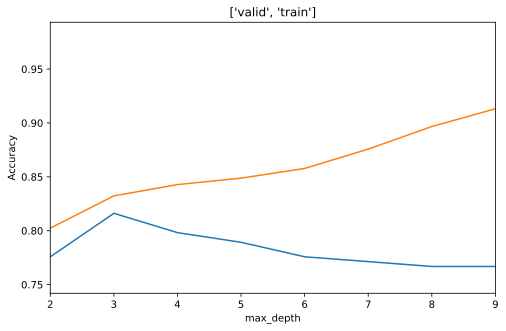

In [205]:
rcParams['figure.figsize'] = 8, 5
plt.plot(max_depth_arr, accuracy_valid)
plt.plot(max_depth_arr, accuracy_train)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title(['valid', 'train'])
plt.xlim(2, 9)

In [206]:
clf = DecisionTreeClassifier(max_depth=val, random_state=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)

In [207]:
accuracy_score(y_valid, y_pred)

0.757847533632287

RandomForest

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
from sklearn.model_selection import GridSearchCV

In [218]:
parameters = [{'n_estimators': [150, 200, 250],
             'max_features': np.arange(5, 9),
             'max_depth': np.arange(5, 10)}]

In [219]:
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                  param_grid=parameters,
                  scoring='accuracy',
                  cv=5)

In [223]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([5, 6, 7, 8, 9]),
                          'max_features': array([5, 6, 7, 8]),
                          'n_estimators': [150, 200, 250]}],
             scoring='accuracy')

In [225]:
clf.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}

In [226]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

In [227]:
y_pred = clf.predict(x_valid)
accuracy_score(y_valid, y_pred)

0.8161434977578476

Полученный классификатор clf равносилен такой модели:

In [236]:
clf = RandomForestClassifier(max_depth = 5, max_features = 5,  n_estimators = 200, random_state = 100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)

In [234]:
accuracy_score(y_valid, y_pred)

0.7892376681614349